In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 5.1.1 1차원 확률변수의 정의

- 확률질량함수
 - 확률은 변수가 취할 수 있는 값 x를 인수로 하는 함수로 볼 수 있음.
 - f(x) -> 확률질량함수, 확률함수
 - 확률변수가 취할 수 있는 값과 그 확률의 구체적 대응 -> 확률분포

In [2]:
x_set = np.array([1,2,3,4,5,6])

불공정한 주사위만들기

In [5]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [6]:
X = [x_set,f] # 확률변수 X 정의

확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 곧 확률분포!

In [10]:
# 확률 p_k 구한다
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

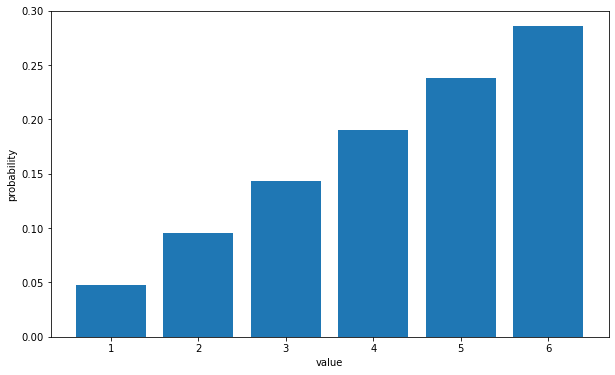

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

- 확률의 성질
 - 절대적으로 0 이상
 - 모두 더하면 1

In [13]:
np.all(prob>=0)

True

np.all 은 모든 요소가 참일 때만 참을 반환하는 함수

In [14]:
np.sum(prob)

0.9999999999999999